In [1]:
# Imports and Definitions
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Constants

# Define the Rabi oscillation function with damping
def Rabi(t, A, omega, T2, phi, C):
    """
    Rabi oscillation with damping.
    t: Time (independent variable)
    A: Amplitude of oscillation
    omega: Angular frequency of oscillation
    gamma: Damping factor
    phi: Phase shift
    C: Constant offset
    """
    return A * np.exp(-t/T2) * np.cos(omega * t + phi) + C

def Rabi_rate(Omega0, Delta):
    """
    Calculate the detuning based on the Rabi frequency and the detuning parameter.
    Omega0: Rabi frequency
    Delta: Detuning parameter
    """
    return np.sqrt(Omega0**2 + Delta**2)

def Rabi_amp(A0, Omega0, Delta):
    """
    Calculate the amplitude based on the initial amplitude.
    A0: Initial amplitude
    """
    return A0 * Omega0**2/Rabi_rate(Omega0, Delta)**2

def mhz_to_rad_ns(frequency_mhz):
    """
    Convert frequency from MHz to angular frequency in rad/ns.
    frequency_mhz: Frequency in MHz
    Returns: Angular frequency in rad/ns
    """
    return 2 * np.pi * frequency_mhz / 1e3

def rad_ns_to_mhz(omega):
    """
    Convert angular frequency from rad/ns to MHz.
    omega: Angular frequency in rad/ns
    Returns: Frequency in MHz
    """
    return omega / (2 * np.pi) * 1e3


In [27]:
# Create a Dataset

ysim=np.linspace(5, 80, 500)
xsim1=np.linspace(-60,210,500)
xsim2=np.linspace(-60,210,500)-130
Delta1=mhz_to_rad_ns(xsim1)
Delta2=mhz_to_rad_ns(xsim2)
A1=7
A2=20
Omega01=0.3
Omega02=0.3
A0=24 # a.u. 
phi2=-100*2*np.pi/360
phi1=-150*2*np.pi/360
T2=30 # ns

I1=np.zeros((len(ysim), len(Delta1)))
for i, t in enumerate(ysim):
    for j, d in enumerate(Delta1):
        A=Rabi_amp(A1, Omega01, d)
        Omega=Rabi_rate(Omega01, d)
        I1[i,j] = Rabi(t, A, Omega,T2, phi1, 0)

I2=np.zeros((len(ysim), len(Delta2)))
for i, t in enumerate(ysim):
    for j, d in enumerate(Delta2):
        A=Rabi_amp(A2, Omega02, d)
        Omega=Rabi_rate(Omega02, d)
        I2[i,j] = Rabi(t, A, Omega,T2, phi2, 0)

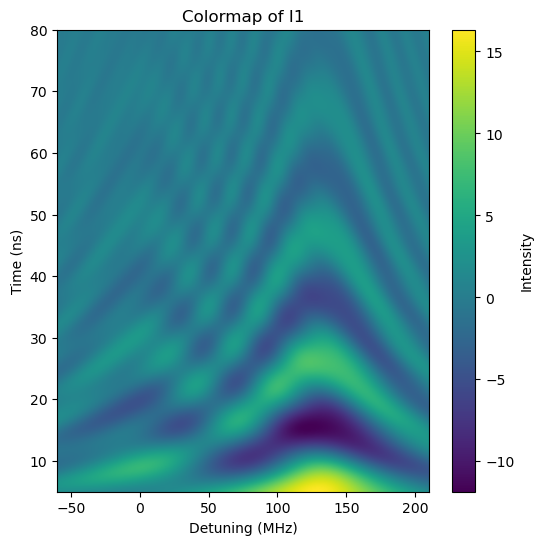

In [28]:
## Plot
plt.figure(figsize=(6, 6))
plt.imshow(I1+I2, extent=[xsim1[0], xsim1[-1], ysim[0], ysim[-1]], aspect='auto', origin='lower', cmap='magma')
plt.colorbar(label='Intensity')
plt.set_cmap('viridis')
plt.xlabel('Detuning (MHz)')
plt.ylabel('Time (ns)')
plt.title('Colormap of I1')
plt.ylim(5, 80)
plt.show()


#plt.figure(figsize=(10, 6))
#plt.imshow(I2, extent=[xsim2[0], xsim2[-1], ysim[0], ysim[-1]], aspect='auto', origin='lower', cmap='magma')
#plt.colorbar(label='Intensity')
#plt.set_cmap('viridis')
#plt.xlabel('Detuning (MHz)')
#plt.ylabel('Time (ns)')
#plt.title('Colormap of I2')
#plt.ylim(5, 80)
#plt.show()'